

{% include toc title="In This Lesson" icon="file-text" %}



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Be able to list atleast 3 sources of uncertainty / error associated with remote sensing data.

* Be able to interpret a scatter plot that compares remote sensing values with field measured values to determine how "well" the two metrics compare.

* Be able to describe 1-3 ways to better understand sources of error associated with a comparison between remote sensing values with field measured values.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You will need a computer with internet access to complete this lesson and the data for week 5 of the course.



</div>



## Understanding uncertainty and error.



It is important to consider error and uncertainty when presenting scientific

results. Most measurements that we make - be they from instruments or humans -

have uncertainty associated with them. We will discuss what

that means, below.



## Uncertainty



**Uncertainty:** Uncertainty quantifies the range of values within which the

value of the measure falls within - within a specified level of confidence. The

uncertainty quantitatively indicates the "quality" of your measurement. It

answers the question: "how well does the result represent the value of the

quantity being measured?"



### Tree height measurement example



So for example let's pretend that we measured the height of a tree 10 times. Each

time our tree height measurement may be slightly different? Why? Because maybe

each time we visually determined the top of the tree to be in a slightly different

place. Or maybe there was wind that day during measurements that

caused the tree to shift as we measured it yielding a slightly different height each time. or... what other reasons can you think of that might impact tree height

measurements?



<figure>

   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/measuring-tree-height.jpg">

   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/measuring-tree-height.jpg" alt="national geographic scaling trees graphic"></a>

   <figcaption>When we measure tree height by hand, many different variables may impact the accuracy and precision of our results. Source:  http://www.haddenham.net/newsroom/guess-tree-height.html

   </figcaption>

</figure>



## What is the true value?



So you may be wondering, what is the true height of our tree?

In the cause of a tree in a forest, it's very difficult to determine the

true height. So we accept that there will be some variation in our measurements

and we measure the tree over and over again until we understand the range of

heights that we are likely to get when we measure the tree.




In [323]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

import numpy as np
import geopandas as gpd
import rasterio as rio
from rasterio import plot as riop
import rasterstats as rs

import geocoder
import contextily as ctx
from shapely.geometry import Point
plt.ion()

heights    10.063636
dtype: float64
heights    0.412971
dtype: float64


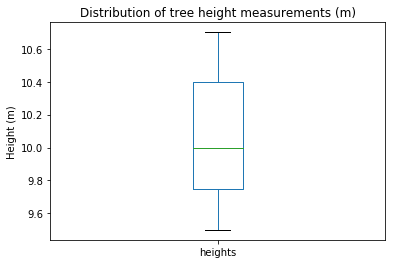

In [324]:
tree_heights = pd.DataFrame([10, 10.1, 9.9, 9.5, 9.7, 9.8, 9.6, 10.5, 10.7, 10.3, 10.6], columns=['heights'])

# What is the average tree height
print(tree_heights.mean(0))

# What is the standard deviation of measurements?
print(tree_heights.std())

# Make a boxplot to visualize
ax = tree_heights.plot.box()
_ = ax.set(title="Distribution of tree height measurements (m)", ylabel="Height (m)")

# ```{r standard-error, fig.cap="Distribution of tree heights." }

# # create data frame containing made up tree heights

# tree_heights <- data.frame(heights=c(10, 10.1, 9.9, 9.5, 9.7, 9.8,

#                                      9.6, 10.5, 10.7, 10.3, 10.6))

# # what is the average tree height

# mean(tree_heights$heights)

# # what is the standard deviation of measurements?

# sd(tree_heights$heights)

# boxplot(tree_heights$heights,

#         main="Distribution of tree height measurements (m)",

#         ylab="Height (m)",

#         col="springgreen")



# ```




In the example above, our mean tree height value is towards the center of

our distribution of measured heights. We might expect that the sample mean of

our observations provides a reasonable estimate of the true value. The

variation among our measured values may also provide some information about the

precision (or lack thereof) of the measurement process.



<a href="http://www.physics.csbsju.edu/stats/box2.html" target="_blank">Read more about  the basics of a box plot</a>




[Text(0.5,0,'Height (m)'),
 Text(0.5,1,'Distribution of measured tree height values')]

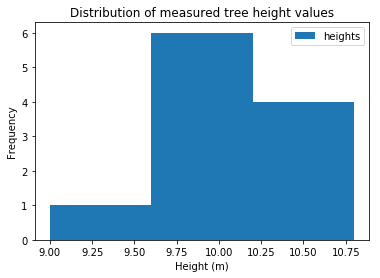

In [325]:
ax = tree_heights.plot.hist(bins=[9, 9.6, 10.2, 10.8])
ax.set(title="Distribution of measured tree height values", xlabel="Height (m)")

#      xlab="Height (m)"
# ```{r hist-tree-height, fig.cap="Tree height distribution"}

# # view distribution of tree height values

# hist(tree_heights$heights, breaks=c(9,9.6,10.4,11),

#      main="Distribution of measured tree height values",

#      xlab="Height (m)", col="purple")



# ```




## Measurement accuracy



Measurement **accuracy** is a concept that relates to whether there is bias in

measurements, i.e. whether the expected value of our observations is close to

the true value. For low accuracy measurements, we may collect many observations,

and the mean of those observations may not provide a good measure of the truth

(e.g., the height of the tree). For high accuracy measurements, the mean of

many observations would provide a good measure of the true value. This is

different from **precision**, which typically refers to the variation among

observations. Accuracy and precision are not always tightly coupled. It is

possible to have measurements that are very precise but inaccurate, very

imprecise but accurate, etc.



## Systematic vs Random error



**Systematic error:** a systematic error is one that tends to shift all measurements

in a systematic way. This means that the mean value of a set of measurements is

consistently displaced or varied in a predictable way, leading to inaccurate observations.

Causes of systematic errors may be known or unknown but should always be corrected for when present.

For instance, no instrument can ever be calibrated perfectly, so when a group of measurements systematically differ from the value of a standard reference specimen, an adjustment in the values should be made.

Systematic error can be corrected for only when the "true value" (such as the value assigned to a calibration or reference specimen) is known.



*Example:* Remote sensing instruments need to be calibrated. For example a laser in

a lidar system may be tested in a lab to ensure that the distribution of output light energy

is consistent every time the laser "fires".



**Random error:** is a component of the total error which, in the course of a number of measurements, varies in an unpredictable way. It is not possible to correct for random error.  Random errors can occur for a variety of reasons such as:



* Lack of equipment sensitivity. An instrument may not be able to respond to or indicate a change in some quantity that is too small or the observer may not be able to discern the change.

* Noise in the measurement.  Noise is extraneous disturbances that are unpredictable or random and cannot be completely accounted for.

* Imprecise definition. It is difficult to exactly define the dimensions of a object.  For example, it is difficult to determine the ends of a crack with measuring its length.  Two people may likely pick two different starting and ending points.



*Example:* random error may be introduced when we measure tree heights as discussed above.



- <a href="https://www.nde-ed.org/GeneralResources/ErrorAnalysis/UncertaintyTerms.htm">Source: nde-ed.org</a>





<figure>

   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-5/accuracy_precision.png">

   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/accuracy_precision.png" alt="national geographic scaling trees graphic"></a>

   <figcaption>Accuracy vs precision. Accuracy quantifies how close a measured value is to the true value. Precision quantifies how close two or more measurements agree with each other (how quantitatively repeatable are the results) Source: http://www.ece.rochester.edu/courses/ECE111/error_uncertainty.pdf

   </figcaption>

</figure>



## Using lidar to estimate tree height



We use lidar data to estimate tree height because it is an efficient way to measure

large areas of trees (forests) quantitatively. However, we can process the lidar

data in many different ways to estimate height. Which method most closely represents

the actual heights of the trees on the ground?



<figure>

   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/scaling-trees-nat-geo.jpg">

   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/scaling-trees-nat-geo.jpg" alt="national geographic scaling trees graphic"></a>

   <figcaption>It can be difficult to measure the true height of trees! Often times "seeing" the very top of the tree where it is tallest is not possible from the ground - especially in dense, tall forests. One can imagine the amount of uncertainty that is thus introduced when we try to estimate the true height of trees! Image Source:

   National Geographic

   </figcaption>

</figure>



<figure>

   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/waveform.png" target="_blank">

   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/waveform.png" alt="Example of a lidar waveform"></a>

   <figcaption>An example LiDAR waveform. Source: NEON, Boulder, CO.

   </figcaption>

</figure>





<figure>

   <a href="{{ site.url }}/images/course-materials/earth-analytics/week-3/Treeline_ScannedPoints.png">

   <img src="{{ site.url }}/images/course-materials/earth-analytics/week-3/Treeline_ScannedPoints.png" alt="example of a tree profile after a lidar scan."></a>

   <figcaption>Cross section showing LiDAR point cloud data (above) and the

   corresponding landscape profile (below). Graphic: Leah A. Wasser

   </figcaption>

</figure>








In [326]:
folders = glob('../../../../../../../data/week05/california/*')
files = glob(folders[0] + '/*.shp') + glob(folders[1] + '/*/*.shp') + glob(folders[1] + '/*/*/*')
files

['../../../../../../../data/week05/california/madera-county-roads/tl_2013_06039_roads.shp',
 '../../../../../../../data/week05/california/SJER/vector_data/SJER_crop.shp',
 '../../../../../../../data/week05/california/SJER/vector_data/SJER_plot_centroids.shp',
 '../../../../../../../data/week05/california/SJER/2013/insitu/veg_chemistry',
 '../../../../../../../data/week05/california/SJER/2013/insitu/veg_metadata_desc_DataInstitute2016.csv',
 '../../../../../../../data/week05/california/SJER/2013/insitu/veg_structure',
 '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarAspect.tif',
 '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarCHM.tif',
 '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarDSM.tif',
 '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarDTM.tif',
 '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarSlope.tif',
 '../../../../../../../data/week05/california/SJER/2013/spectr

In [327]:
lidar_tif_path = '../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarCHM.tif'
SJER_chm = rio.open('../../../../../../../data/week05/california/SJER/2013/lidar/SJER_lidarCHM.tif')

SJER_plots = gpd.read_file('../../../../../../../data/week05/california/SJER/vector_data/SJER_plot_centroids.shp')
stats = rs.zonal_stats(SJER_plots, lidar_tif_path, geojson_out=True, tranform=SJER_chm.transform)
SJER_height = gpd.GeoDataFrame.from_features(stats)

path_insitu = '../../../../../../../data/week05/california/SJER/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv'
SJER_insitu = pd.read_csv(path_insitu)
insitu_stem_height = SJER_insitu.groupby('plotid').max()['stemheight'].reset_index()

SJER_height = pd.merge(insitu_stem_height, SJER_height, left_on='plotid', right_on='Plot_ID')
SJER_height
# ```{r uncertainty-lidar, echo=F, warning=FALSE, message=FALSE, results = "hide" }



# # load libraries

# library(raster)

# library(rgdal)

# library(rgeos)

# library(ggplot2)

# library(dplyr)



# options(stringsAsFactors = FALSE)

# SJER_chm <- raster("data/week5/california/SJER/2013/lidar/SJER_lidarCHM.tif")





# SJER_chm[SJER_chm==0] <- NA



# SJER_plots <- readOGR("data/week5/california/SJER/vector_data",

#                       "SJER_plot_centroids")



# # extract max height

# SJER_height <- extract(SJER_chm,

#                     SJER_plots,

#                     buffer = 20, # specify a 20 m radius

#                     fun=max, # extract the MEAN value from each plot

#                     sp=TRUE, # create spatial object

#                     stringsAsFactors=FALSE)



# # import the centroid data and the vegetation structure data

# SJER_insitu <- read.csv("data/week5/california/SJER/2013/insitu/veg_structure/D17_2013_SJER_vegStr.csv",

#                         stringsAsFactors = FALSE)



# # find the max and mean stem height for each plot

# insitu_stem_height <- SJER_insitu %>%

#   group_by(plotid) %>%

#   summarise(insitu_max = max(stemheight))



# # merge the insitu data into the centroids data.frame

# SJER_height <- merge(SJER_height,

#                      insitu_stem_height,

#                    by.x = 'Plot_ID',

#                    by.y = 'plotid')

# ```


/Users/choldgraf/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/choldgraf/anaconda/lib/python3.6/site-packages/rasterstats/main.py:142: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  with Raster(raster, affine, nodata, band) as rast:
/Users/choldgraf/anaconda/lib/python3.6/site-packages/rasterstats/io.py:242: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  self.affine = guard_transform(self.src.transform)


,plotid,stemheight,Plot_ID,Point,count,easting,geometry,max,mean,min,northing,plot_type
0,SJER1068,19.3,SJER1068,center,1,255852.376,POINT (255852.376 4111567.818),0.000000,0.000000,0.000000,4111567.818,trees
1,SJER112,23.9,SJER112,center,1,257406.967,POINT (257406.967 4111298.971),22.279999,22.279999,22.279999,4111298.971,trees
2,SJER116,16.0,SJER116,center,1,256838.760,POINT (256838.76 4110819.876),0.000000,0.000000,0.000000,4110819.876,grass
3,SJER117,11.0,SJER117,center,1,256176.947,POINT (256176.947 4108752.026),0.000000,0.000000,0.000000,4108752.026,trees
4,SJER120,8.8,SJER120,center,1,255968.372,POINT (255968.372 4110476.079),0.000000,0.000000,0.000000,4110476.079,grass
5,SJER128,18.2,SJER128,center,1,257078.867,POINT (257078.867 4111388.57),0.000000,0.000000,0.000000,4111388.570,trees
6,SJER192,13.7,SJER192,center,1,256683.434,POINT (256683.434 4111071.087),0.000000,0.000000,0.000000,4111071.087,grass
7,SJER272,12.4,SJER272,center,1,256717.467,POINT (256717.467 4112167.778),0.000000,0.000000,0.000000,4112167.778,trees
8,SJER2796,9.4,SJER2796,center,1,256034.390,POINT (256034.39 4111533.879),0.000000,0.000000,0.000000,4111533.879,soil
9,SJER3239,17.9,SJER3239,center,1,258497.102,POINT (258497.102 4109856.983),0.000000,0.000000,0.000000,4109856.983,soil




## Study site location



To answer the question above, let's look at some data from a study site location

in California - the San Joaquin Experimental range field site. You can see the field

site location on the map below.




In [328]:
# Pull the california lat / long pair, then fetch a box around it
cali = geocoder.google('california')
zoom = 6
# _ = ctx.howmany(cali.west, cali.south, cali.east, cali.north, zoom, ll=True)  # Tel tell how big the download is
_ = ctx.bounds2raster(cali.west, cali.south, cali.east, cali.north, 6, './cali.tif', ll=True, url=ctx.sources.ST_TERRAIN)
calir = rio.open('./cali.tif')

# Fetch the state boundaries
state_boundary_us = gpd.read_file(
    "../../../../../../../data/week05/usa-boundary-layers/US-State-Boundaries-Census-2014.shp")

# Generate our LatLng for the station we care about
SJER_chm_point = Point(SJER_chm.bounds[0], SJER_chm.bounds[1])
SJER_chm_df = pd.DataFrame([SJER_chm_point], columns=['geometry'])
SJER_chm_gpd = gpd.GeoDataFrame(SJER_chm_df, crs=SJER_chm.crs)

# Project into the same CRS
state_boundary_us_chm = state_boundary_us.to_crs(calir.crs)
SJER_chm_gpd = SJER_chm_gpd.to_crs(calir.crs)


# Make the figure
fig, ax = plt.subplots(figsize=(10, 10))

# Load the tile raster (note the re-arrangement of the bounds)
bb = calir.bounds
riop.show(calir, ax=ax)
# ax.imshow(img, extent=(bb.left, bb.right, bb.bottom, bb.top))
state_boundary_us_chm.plot(ax=ax, alpha=.3)
SJER_chm_gpd.plot(ax=ax, markersize=50, color='r')

# ```{r ggmap, echo=F, warning=F, message=F, results = "hide"}

# library(ggmap)

# cali_map <- get_map(location = "California",

#           source="google",

#           maptype="terrain", crop=FALSE,

#           zoom=6)



# # creating a sample data.frame with your lat/lon points

# lon <- c(SJER_chm@extent@xmin)

# lat <- c(SJER_chm@extent@ymin)



# # import us data

# state_boundary_us <- readOGR("data/week5/usa-boundary-layers",

#           "US-State-Boundaries-Census-2014")

# df <- as.data.frame(cbind(lon,lat))

# site_location <- SpatialPoints(df, proj4string = crs(SJER_chm))

# site_location_wgs84 <- spTransform(site_location, CRSobj = crs(state_boundary_us))



# site_locat_points <- as.data.frame(coordinates(site_location_wgs84))

# ```





# ```{r ggmap-plot, echo=F, warning=F, message=F, results = "hide", fig.cap="ggmap of study area."}

# # create a map with a point location for boulder.

# ggmap(cali_map) + labs(x = "", y = "") +

#   geom_point(data = site_locat_points, aes(x = lon, y = lat, fill = "red", alpha = 0.2), size = 5, shape = 19) +

#   guides(fill=FALSE, alpha=FALSE, size=FALSE)



# ```


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/choldgraf/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-328-5b1a8058b0ca>", line 5, in <module>
    _ = ctx.bounds2raster(cali.west, cali.south, cali.east, cali.north, 6, './cali.tif', ll=True, url=ctx.sources.ST_TERRAIN)
  File "/Users/choldgraf/anaconda/lib/python3.6/site-packages/contextily/__init__.py", line 63, in bounds2raster
    Z, ext = bounds2img(w, s, e, n, zoom, url, ll=True)
  File "/Users/choldgraf/anaconda/lib/python3.6/site-packages/contextily/__init__.py", line 130, in bounds2img
    fh = urlopen(tile_url)
  File "/Users/choldgraf/anaconda/lib/python3.6/urllib/request.py", line 223, in urlopen
    return opener.open(url, data, timeout)
  File "/Users/choldgraf/anaconda/lib/python3.6/urllib/request.py", line 526, in open
    response = self._open(req, data)
  File "/Users/choldgraf/anaconda/lib/py

TimeoutError: [Errno 60] Operation timed out



## Study area plots



At this study site, we have both lidar data - specifically a canopy height model

that was processed by NEON (National Ecological Observatory Network). We also

have some "ground truth" data. That is we have measured tree height values collected at a set

of field site plots by technicians at NEON. We will call these measured values

*in situ* measurements.



A map of our study plots is below overlaid on top of the canopy height mode.




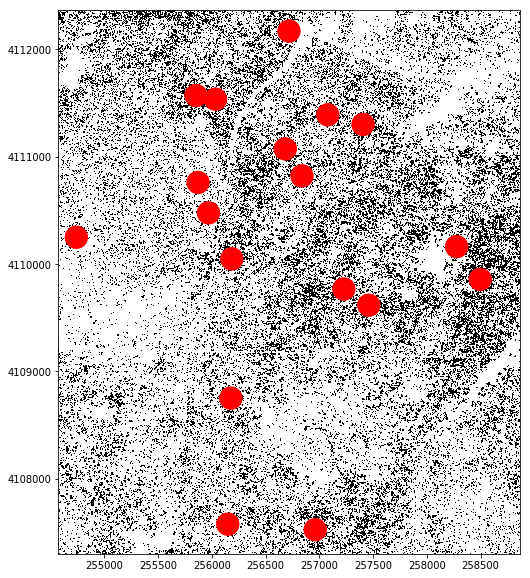

In [330]:
img = SJER_chm.read().squeeze()
img[img == 0] = np.nan

fig, ax = plt.subplots(figsize=(10, 10))
# riop.show(SJER_chm, cmap='Greys', ax=ax)
ax.imshow(img, cmap='Greys', extent=[SJER_chm.bounds[ii] for ii in [0, 2, 1, 3]])
SJER_plots.plot(ax=ax, markersize=500, color='r')


# ```{r plot-plots, fig.cap="plots", echo=F}

# # Overlay the centroid points and the stem locations on the CHM plot

# plot(SJER_chm,

#      main="Study area plot locations",

#      col=gray.colors(100, start=.3, end=.9),

#      legend=F,

#      box=F, # turn off black border

#      axes=F) # turn off axis labels and ticks



# # pch 0 = square

# plot(SJER_plots,

#      pch = 15,

#      cex = 2,

#      col = "magenta",

#      add=TRUE)

# par(xpd=T)

# legend(SJER_chm@extent@xmax+100, SJER_chm@extent@ymax,

#        legend="Plot \nlocations",

#        pch = 15,

#        col = "magenta",

#        bty="n")



# ```




### Compare lidar derived height to in situ measurements



We can compare maximum tree height values at each plot to the maximum pixel value

in our CHM for each plot. To do this, we define the geographic boundary of our plot

using a polygon - in the case below we use a circle as the boundary. We then extract

the raster cell values for each circle and calculate the max value for all of the

pixels that fall within the plot area.



Then, we calculate the max height of our measured plot tree height data.



Finally we compare the two using a scatter plot to see how closely the data relate.

Do they follow a 1:1 line? Do the data diverge from a 1:1 relationship?



<figure>

    <img src="{{ site.url }}/images/course-materials/earth-analytics/week-5/buffer-circular.png" alt="buffer circular">

    <figcaption>The extract function in R allows you to specify a circular buffer

    radius around an x,y point location. Values for all pixels in the specified

    raster that fall within the circular buffer are extracted. In this case, we

    will tell R to extract the maximum value of all pixels using the fun=max

    command. Source: Colin Williams, NEON

    </figcaption>

</figure>




In [332]:
SJER_height.columns

Index(['plotid', 'stemheight', 'Plot_ID', 'Point', 'count', 'easting',
       'geometry', 'max', 'mean', 'min', 'northing', 'plot_type'],
      dtype='object')

In [ ]:
SJER_li

In [331]:
SJER_height.plot('max', '')

,plotid,stemheight,Plot_ID,Point,count,easting,geometry,max,mean,min,northing,plot_type
0,SJER1068,19.3,SJER1068,center,1,255852.376,POINT (255852.376 4111567.818),0.000000,0.000000,0.000000,4111567.818,trees
1,SJER112,23.9,SJER112,center,1,257406.967,POINT (257406.967 4111298.971),22.279999,22.279999,22.279999,4111298.971,trees
2,SJER116,16.0,SJER116,center,1,256838.760,POINT (256838.76 4110819.876),0.000000,0.000000,0.000000,4110819.876,grass
3,SJER117,11.0,SJER117,center,1,256176.947,POINT (256176.947 4108752.026),0.000000,0.000000,0.000000,4108752.026,trees
4,SJER120,8.8,SJER120,center,1,255968.372,POINT (255968.372 4110476.079),0.000000,0.000000,0.000000,4110476.079,grass
5,SJER128,18.2,SJER128,center,1,257078.867,POINT (257078.867 4111388.57),0.000000,0.000000,0.000000,4111388.570,trees
6,SJER192,13.7,SJER192,center,1,256683.434,POINT (256683.434 4111071.087),0.000000,0.000000,0.000000,4111071.087,grass
7,SJER272,12.4,SJER272,center,1,256717.467,POINT (256717.467 4112167.778),0.000000,0.000000,0.000000,4112167.778,trees
8,SJER2796,9.4,SJER2796,center,1,256034.390,POINT (256034.39 4111533.879),0.000000,0.000000,0.000000,4111533.879,soil
9,SJER3239,17.9,SJER3239,center,1,258497.102,POINT (258497.102 4109856.983),0.000000,0.000000,0.000000,4109856.983,soil


In [ ]:
# ```{r plot-data, fig.cap="final plot", echo=F, warning=F, message=F}



# # create plot

# p <-ggplot(SJER_height@data, aes(x = insitu_max, y=SJER_lidarCHM)) +

#   geom_point() +

#   theme_bw() +

#   xlab("Mean measured height (m)") +

#   ylab("Mean LiDAR pixel (m)") +

#   ggtitle("Lidar Derived Max Tree Height \nvs. InSitu Measured Max Tree Height") +

#   geom_abline(intercept = 0, slope=1) +

#   geom_smooth(method=lm)



# p



# ```




### How different are the data?




In [ ]:
```{r view-diff, echo=F, fig.cap="box plot showing differences between chm and measured heights."}

# Calculate difference

SJER_height@data$ht_diff <-  (SJER_height@data$SJER_lidarCHM - SJER_height@data$insitu_max)

SJER_height@data$Plot_ID <- gsub("SJER", "", SJER_height@data$Plot_ID)

# create bar plot using ggplot()

ggplot(data=SJER_height@data,

       aes(x=Plot_ID, y=ht_diff, fill=Plot_ID)) +

       geom_bar(stat="identity") +

       xlab("Plot Name") + ylab("Height difference (m)") +

       ggtitle("Difference: \nLidar Max height - in situ Max height (m)")



```




## View interactive scatterplot



<a href="https://plot.ly/~leahawasser/170/" target="_blank">View scatterplot plotly</a>





## View interactive difference barplot



<a href="https://plot.ly/~leahawasser/158/chm-minus-insitu-differences/

" target="_blank">View scatterplot differences</a>




In [1]:
```{r ggplotly, echo=F, eval=F}

library(plotly)



Sys.setenv("plotly_username"="leahawasser")

Sys.setenv("plotly_api_key"="#")



plotly_POST(p)



```
